In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
%matplotlib widget
#import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import daytradeai.data as data
import daytradeai.config as config
import daytradeai.preprocess as preprocess
import daytradeai.visualize as visualize
import daytradeai.util as util


# Get Data, Basic EDA

In [4]:
cfg = config.cfg

df_current = data.get_downloaded_data(cfg=cfg["data"])
df_new = data.get_new_data(cfg=cfg["data"], df_current=df_current)


2025-01-29 12:51 - daytradeai.data - INFO - Reading 1 files from /Users/davidschneider/data/daytradeai/prd/yfinance_downloads/dowjones
2025-01-29 12:51 - daytradeai.data - INFO - Fetching new data starting from 2025-01-29 00:00:00
[**********************86%****************       ]  24 of 28 completed2025-01-29 12:51 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**********************93%********************   ]  26 of 28 completed2025-01-29 12:51 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*********************100%***********************]  28 of 28 completed
2025-01-29 12:51 - daytradeai.data - WARNING - No new data found


In [5]:
df_raw = data.combine_dataframes(df_current, df_new)

In [6]:
df_raw[0:3]

Price           Close                                                 \
Ticker           AAPL        AMGN       AMZN         AXP          BA   
Date                                                                   
2020-01-28  76.998718  193.005341  92.662498  123.786827  314.687714   
2020-01-29  78.610481  194.988297  92.900002  123.067192  320.115387   
2020-01-30  78.496582  194.129852  93.533997  124.506500  321.387817   

Price                                                                 ...  \
Ticker             CAT         CRM       CSCO        CVX         DIS  ...   
Date                                                                  ...   
2020-01-28  122.933807  181.834381  40.899197  88.970375  136.681473  ...   
2020-01-29  122.070709  180.760376  40.282749  88.369865  134.399673  ...   
2020-01-30  121.702133  184.638702  40.445435  89.194550  136.128326  ...   

Price         Volume                                                          \
Ticker           MMM       MRK      MSFT      NKE       PG      TRV      UNH   
Date                                                                           
2020-01-28  10669157   9496347  24899900  5673200  6200200  1297700  4341000   
2020-01-29   6391304   8511227  34754500  4503700  5271000  1270900  3963800   
2020-01-30   5211092  11016471  51597500  7065100  5894400  1409700  4211800   

Price                                    
Ticker            V        VZ       WMT  
Date                                     
2020-01-28  7215700  15367500  15810600  
2020-01-29  7041700  13408900  11326500  
2020-01-30  8571900  16719600  13744500  

[3 rows x 196 columns]

In [7]:
cfg = config.cfg

df_preprocessed = preprocess.preprocess_data(df=df_raw, data_cfg=cfg["data"], preprocess_cfg=cfg["preprocess"])

2025-01-29 12:51 - daytradeai.preprocess - INFO - Preprocessing data...
2025-01-29 12:51 - daytradeai.preprocess - INFO - Adding index fund
2025-01-29 12:51 - daytradeai.preprocess - INFO - Adding diff lag features
/Users/davidschneider/code/mrcartoonology/DayTradeAI/src/daytradeai/preprocess.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature_name] = cur - past
/Users/davidschneider/code/mrcartoonology/DayTradeAI/src/daytradeai/preprocess.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature_name] = cur - 

In [8]:
df_preprocessed[0:3]

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,label_JNJ,label_MMM,label_DIS,label_MRK,label_WMT,label_NKE,label_KO,label_CSCO,label_VZ,label_cash
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,75.765053,191.915167,92.025002,123.366263,316.168891,123.185536,180.133872,40.685154,88.858282,134.834297,...,0,0,1,0,0,0,0,1,1,0
2020-01-29,78.637146,193.571922,93.199997,123.814869,322.431623,123.697957,182.977985,41.070426,89.234584,136.908687,...,1,0,0,1,1,0,1,0,0,1
2020-01-30,77.689491,194.001096,92.900002,122.198054,318.604390,121.153722,179.895193,39.846115,87.921482,133.441517,...,0,0,1,0,0,0,1,1,1,0


In [9]:
preprocess.save_preprocessed(df_preprocessed, cfg["preprocess"])

2025-01-29 12:51 - daytradeai.preprocess - INFO - Overwriting preprocessed data: /Users/davidschneider/data/daytradeai/prd/preprocessed/2025-01-28.parquet


In [10]:
[c for c in df_preprocessed.columns if "BA" in c and '1d' in c]

['BA_diff_0d_1d',
 'BA_diff_1d_1d',
 'BA_pdiff_0d_1d',
 'BA_pdiff_1d_1d',
 'BA_lag_0d_1d',
 'BA_lag_1d_1d']

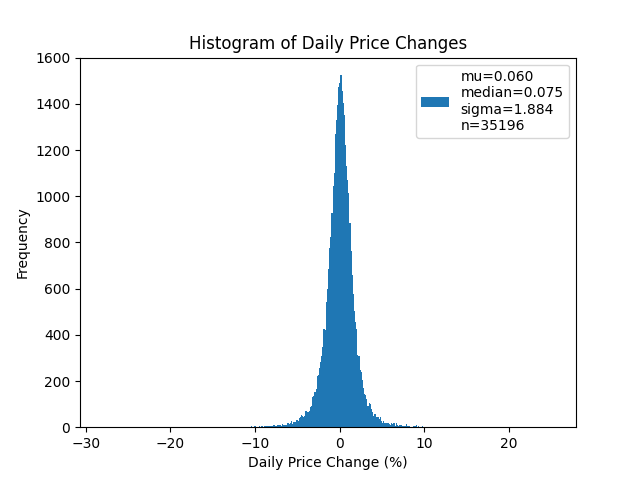

In [11]:
tickers = data.get_tickers(group=cfg['data']['stocks'])
visualize.hist_pdiff_1d(df_preprocessed, tickers=tickers);

# Random Walk?

If the stock market is a random walk, there would be no structure between yesterdays value and todays. 

This should roughly mean that if i look at yesterdays percentage changes for two different groups, based
on some grouping of todays value - there shouldn't be any difference. Its random day to day, the 
performance today is not conditional on the performance yesterday.

To do a quick analysis - lest group yesterdays percentage change by todays performance. 

What kind of structure? 

yesterdays pdiffs corresponding to todays top 10% and bottom 10% are close - to 10% and bottom 10% - are

goodness of fit tests so unlikely to be same distribution

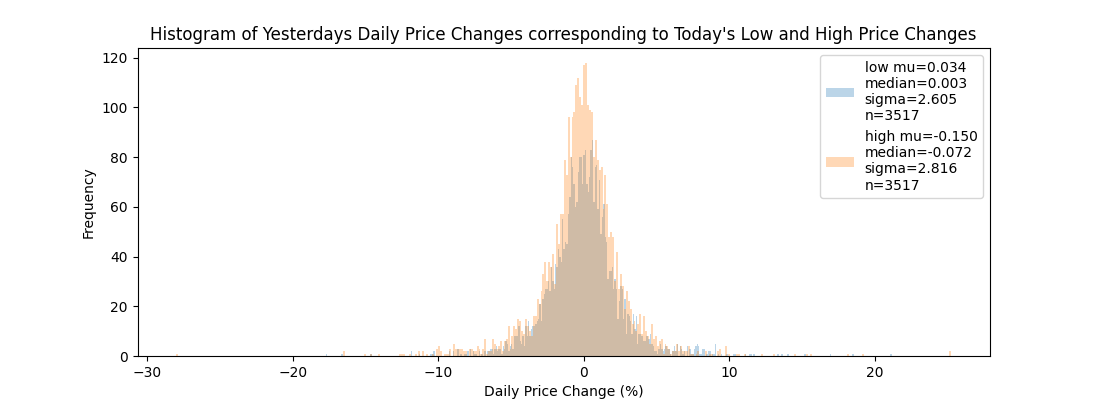

In [17]:
ypdiffs = visualize.hist_pdiff_yesterday_vs_today(df=df_preprocessed, tickers=tickers)

In [18]:
for test, stats in util.goodnes_fit_tests(sample=ypdiffs['low'], population=ypdiffs['high']).items():
    print(f"{test}: {stats['pval']:.5f}")

ks_2samp: 0.07713
ttest_ind: 0.00427
mannwhitneyu: 0.07015


# Sanity Checks

The DIJA [performance](https://www.google.com/search?q=dow+jones+performance+year&rlz=1C5ZNUK_enUS1139US1141&oq=dow+jones+&gs_lcrp=EgZjaHJvbWUqCAgAEEUYJxg7MggIABBFGCcYOzIGCAEQRRhAMggIAhBFGCcYOzINCAMQABiDARixAxiABDINCAQQABiDARixAxiABDINCAUQABiDARixAxiABDINCAYQABiDARixAxiABDIGCAcQRRg80gEIMjIyNWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8) has been 16.84% for the past year, as of today

compute DIJA is a bit tricky
* the index is price weighted
* stocks in the index can change
  * new stocks this past year are NVIDIA and Sherman-Williams
* There is a divisor that is adjusted for stock splits to keep continuity of the index

To keep things simple, we're removing NVIDIA and Sherman-Williams from our data, and just doing a even distribution weighting to compare performance too.

Our yfinance data is showing a 20% performance - it seems like the data is off


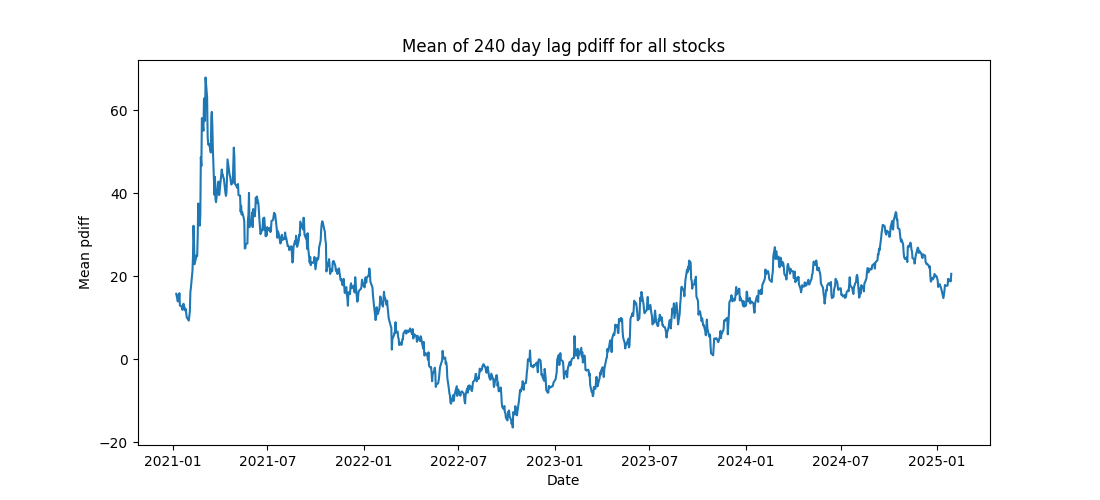

In [19]:
cols = [preprocess.get_feat_name(col=stock, feat='pdiff', anchor=0, lag=240) for stock in tickers]
plt.figure(figsize=(11,5))
plt.plot(df_preprocessed[cols].dropna().mean(axis=1))
#mplcursors.cursor(line, hover=True)
plt.title("Mean of 240 day lag pdiff for all stocks")
plt.ylabel("Mean pdiff")
plt.xlabel("Date")
plt.show()

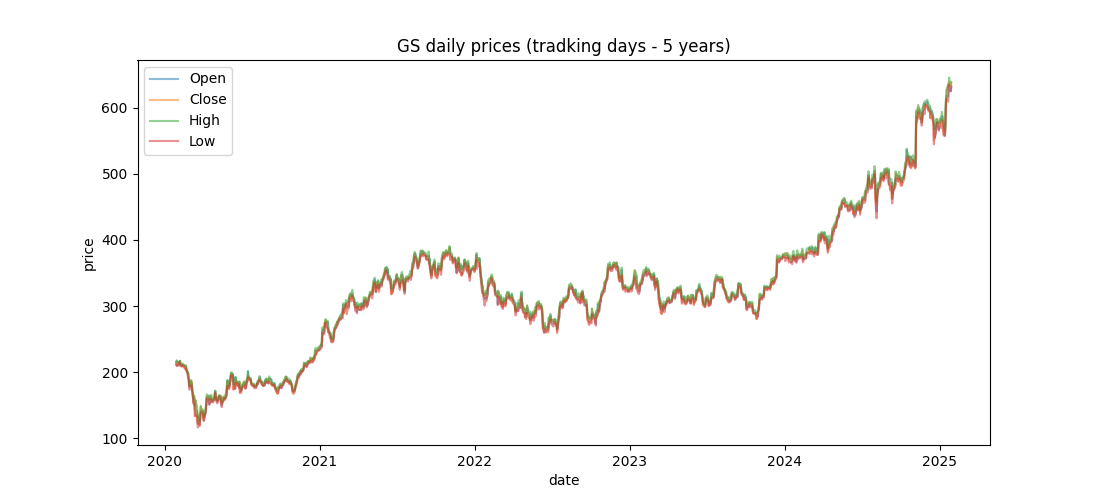

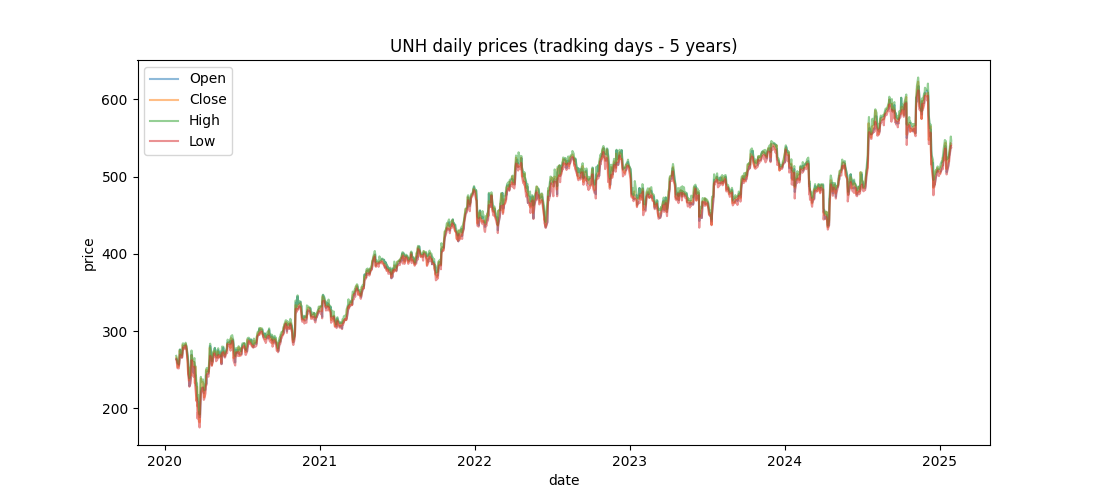

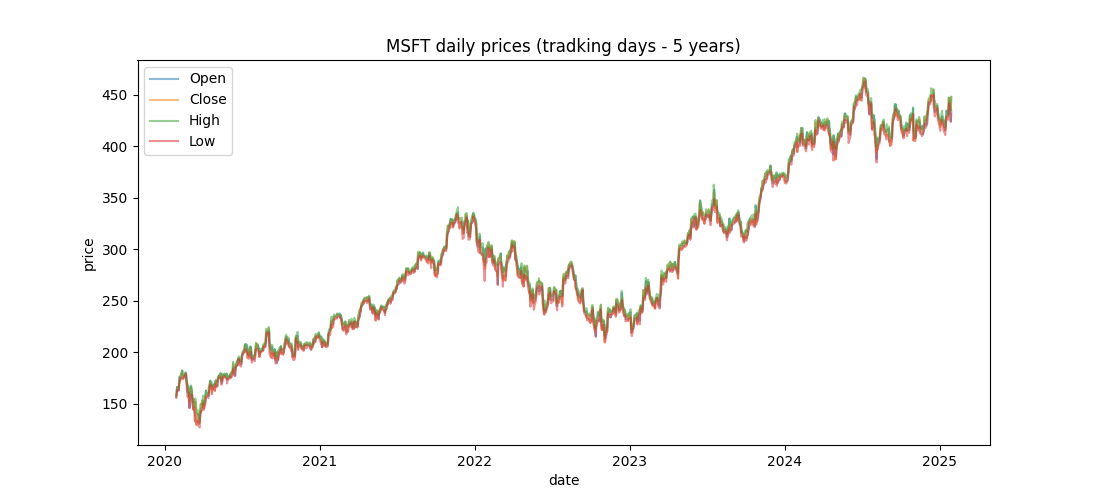

In [23]:
# sanity check stock price for a few stocks

for stock in tickers[0:3]:
    plt.figure(figsize=(11,5))
    for tag in ['Open', 'Close', 'High', 'Low']:
        plt.plot(df_raw[tag][stock], label=tag, alpha=0.5)
    plt.title(f"{stock} daily prices (tradking days - 5 years)")
    plt.xlabel("date")
    plt.ylabel("price")
    plt.legend()
    plt.show()